# Filtering Random Signals (AR Model)

In [2]:
import numpy as np
from numpy.random import default_rng
import scipy.signal as sig
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as stools
import statsmodels.tsa.arima_process as arima
plt.rcParams["figure.figsize"] = (8,5)
rng = default_rng()

Create a random signal (white Gaussian noise) and filter it with a auto-regressive filter.

First part is for demonstration only.

In [3]:
u = rng.standard_normal(30)

<StemContainer object of 3 artists>

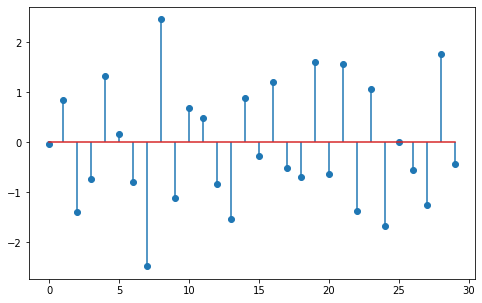

In [4]:
a = [1, 0.6, 0.2]
b = [1]

y = sig.lfilter(b,a,u)
plt.stem(y)

The ACF can be calculated using the Yule-Walker equations...

Now we estimate the ACF from the output signal itself. Careful, `statsmodel` estimates the ACF normalized to $1$.

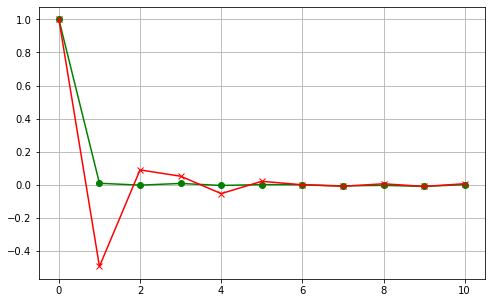

In [27]:
u = rng.standard_normal(10000)
yma = sig.lfilter(b,a,u)

acf_u = stools.acf(u, nlags=10, fft=False)
acf_x = stools.acf(yma, nlags=10, fft=False)

plt.plot(acf_u, '-go', acf_x, '-rx')
plt.grid()

In [29]:
acf_x

array([ 1.00000000e+00, -4.92839172e-01,  9.04473681e-02,  5.23211696e-02,
       -5.27254585e-02,  2.14866061e-02,  3.63387888e-04, -8.41850904e-03,
        6.54400630e-03, -9.34024195e-03,  6.88665466e-03])

We can calculate the ACF by solving the Yule-Walker equations; we use statsmodels as doing this by hand is a bit cumbersome...

In [30]:
arima.arma_acf(a, b, lags=7)

array([ 1.     , -0.5    ,  0.1    ,  0.04   , -0.044  ,  0.0184 ,
       -0.00224])

In [31]:
h = arima.arma_impulse_response(a,b)
h[0:9]

array([ 1.        , -0.6       ,  0.16      ,  0.024     , -0.0464    ,
        0.02304   , -0.004544  , -0.0018816 ,  0.00203776])